# 朴素贝叶斯分类法

朴素贝叶斯方法是一类基于贝叶斯公式的监督学习方法，它假定特征之间两两独立(朴素)。对于一个目标分类变量$y$与$n$个特征$x_1,\cdots,x_n$来说，有如下的贝叶斯公式：
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)}$$

大家注意：左边的式子就是给定特征的取值，求分类变量的概率分布，这就是我们希望计算目标。而右边的三项分别是
* 分类变量$y$自身的概率分布 $P(y)$.
    * 这一项比较容易通过样本来估计，比如$y$是离散分类，我们可以直接统计各个分类的频率
* 特征$\{x_1,\dots,x_n\}$的联合概率分布 $P(x_1, \dots, x_n)$.
    * 这一项不需要计算，因为给定这一项与$y$没有关系，而且自己单独呆在在分母上。于是$$P(y \mid x_1, \dots, x_n)\propto P(y) P(x_1, \dots x_n \mid y)$$
* 特征$\{x_1,\dots,x_n\}$在$y$条件下的联合概率分布 $P(x_1, \dots, x_n\mid y)$.
    * 这一项必须计算，而且当特征较多时候，收数据的限制联合分布一般很难计算。
    * 而朴素贝叶斯方法，就是在特殊假设下对这一项进行简化的算法。

如果我们假定在$y$的条件下$\{x_1,\dots,x_n\}$是两两独立的随机变量。那么对于任何$i,j$,都有$P(x_i, x_j\mid y) = P(x_i\mid y)\cdot P(x_j\mid y)$于是上面的条件联合分布就可以简化为:
$$P(x_1, \dots, x_n\mid y) = \prod\limits_{i=1}^nP(x_i\mid y)$$

而这其中单独的$P(x_i\mid y)$也相对容易通过样本来进行估计，我们可以对$x_i$的分布类型进行建模，然后利用普通的参数估计方法来研究。

不同的特征$P(x_i\mid y)$可能对应于不同类型的概率分布，而每种类型概率分布都对应一个朴素贝叶斯分类方法：
* $x$服从高斯分布时：  高斯朴素贝叶斯
* $x$服从多项分布时：  多项分布朴素贝叶斯
* $x$服从伯努利分布时：伯努利朴素贝叶斯

下面我们给一个高斯朴素贝叶斯的例子(数据和代码来自[sklearn 手册](http://scikit-learn.org/stable/modules/naive_bayes.html))

# iris(鸢尾花)分类数据集
iris 数据集是一个根据iris花的萼片长度，萼片宽度，花瓣长度，花瓣宽度来对花进行分类的数据。
* $x_1,\dots,x_4$四个实数分别对应于上诉四种特征。
* $y$ 是一个正整数，对应于花的分类。
我们的目的是通过一部分数据集进行训练，让我们能够利用iris花的这几项特征来实现花的自动分类。


In [2]:
#载入iris数据
print ('载入iris数据')
from sklearn import datasets
iris = datasets.load_iris()

print ('四个特征数据构成一个m行4列的矩阵')
print (iris.data[::20])

print ('分类数据构成一个m行1列的向量')
print (iris.target[::20])

print ('将数据分为训练数据(x_train,y_train)和测试数据(x_test,y_test)')
X_train = iris.data[::2]
y_train = iris.target[::2]

X_test = iris.data[1::2]
y_test = iris.target[1::2]


载入iris数据
四个特征数据构成一个m行4列的矩阵
[[ 5.1  3.5  1.4  0.2]
 [ 5.4  3.4  1.7  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 5.   2.   3.5  1. ]
 [ 5.5  2.4  3.8  1.1]
 [ 6.3  3.3  6.   2.5]
 [ 6.9  3.2  5.7  2.3]
 [ 6.7  3.1  5.6  2.4]]
分类数据构成一个m行1列的向量
[0 0 0 1 1 2 2 2]
将数据分为训练数据(x_train,y_train)和测试数据(x_test,y_test)


In [3]:
#准备高斯贝叶斯分类器
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
print ('准备高斯贝叶斯分类器')

准备高斯贝叶斯分类器


In [4]:
#训练模型
gnb.fit(X_train, y_train)
print ('训练模型')

训练模型


In [5]:
#利用测试特征X_test,预测得出y_pred, 并与y_test进行比较
print ('利用测试特征X_test,预测得出y_pred, 并与y_test进行比较\n')
y_pred = gnb.predict(X_test)
print("%d 个数据点中，预测错误的一共有 : %d"%(X_test.shape[0],(y_test != y_pred).sum()))


利用测试特征X_test,预测得出y_pred, 并与y_test进行比较

75 个数据点中，预测错误的一共有 : 3


In [6]:
print ('自动分类结果：', y_pred)


print ('真实分类结果', y_test)

自动分类结果： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2]
真实分类结果 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


# 手动训练

In [19]:
import numpy as np

# 高斯分布参数估计器
def GaussianFit(s):
    n = len(s)
    mu = s.mean()
    sigma = np.sqrt(((s - mu)*(s - mu)).sum()/(n-1.))
    return mu, sigma

# 模型训练器
def training(X,y):
    mu = {}
    sigma = {}
    for i in [0,1,2]:
        X_sub = X[(y==i),:]
        mu[i] = np.array([0.,0.,0.,0.])
        sigma[i] = np.array([0.,0.,0.,0.])
        print (X_sub.shape)
        for j in range(4):
            mu[i][j],sigma[i][j] = GaussianFit(X_sub[:,j])
    return mu,sigma

# 预测测试器
def predict(mu,sigma,X):
    m, n = X.shape
    y = np.array([0]*m)
    for i in range(m):
        p = {}
        max_p = 0
        max_ind = -1
        for k in range(3):
            p[k] = 1
            for j in range(n):
                p[k] *= 1/(sigma[k][j] * np.sqrt(2 * np.pi)) * np.exp( - (X[i,j] - mu[k][j])**2 / (2 * sigma[k][j]**2))
            if p[k] > max_p:
#                 print k,p[k],max_p
                max_p = p[k]
                max_ind = k
#         print p
        y[i] = max_ind
    return y
                                                                      
                                                        

In [20]:
mu,sigma=training(X_train, y_train)

(25L, 4L)
(25L, 4L)
(25L, 4L)


In [21]:
y_predict = predict(mu,sigma,X_test)

In [22]:
print("%d 个数据点中，预测错误的一共有 : %d"%(X_test.shape[0],(y_test != y_predict).sum()))

print ('手动分类结果：', y_predict)

print ('真实分类结果', y_test)



75 个数据点中，预测错误的一共有 : 3
手动分类结果： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2]
真实分类结果 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


#  分布函数

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

delta = 0.1
X = np.array([-delta*(20-i) for i in range(40)])
normal_density = stats.norm.pdf(X)

discrete_distribution = X*0 + 0.5
discrete_distribution[X<-1] = 0
discrete_distribution[X>=1] = 1

distributionFun = pd.DataFrame({'X':X, 'normal_density':normal_density, 'discrete_distribution':discrete_distribution})
distributionFun.loc[:,'normal_distribution'] = distributionFun.loc[:,'normal_density'].cumsum() * delta
distributionFun.set_index('X', inplace=True)

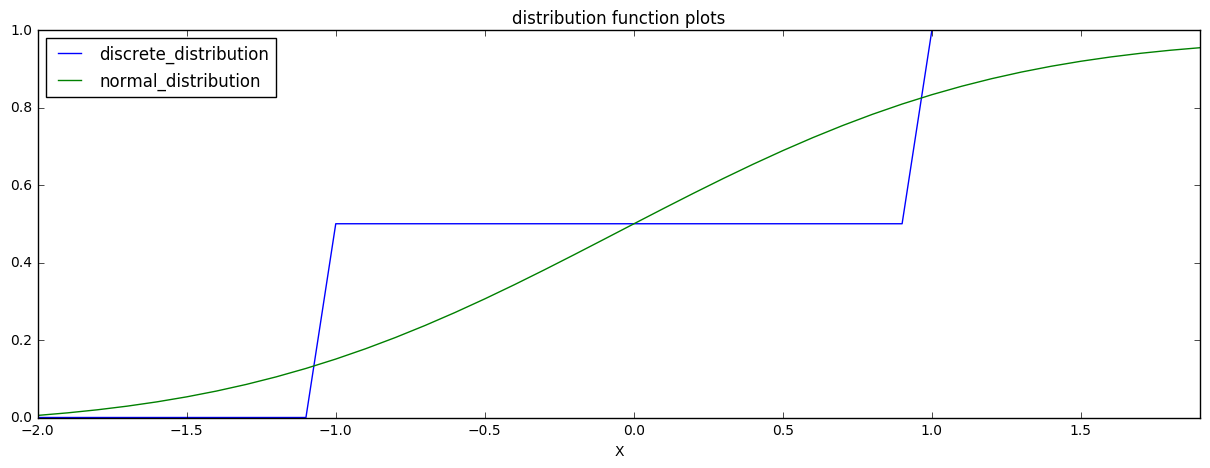

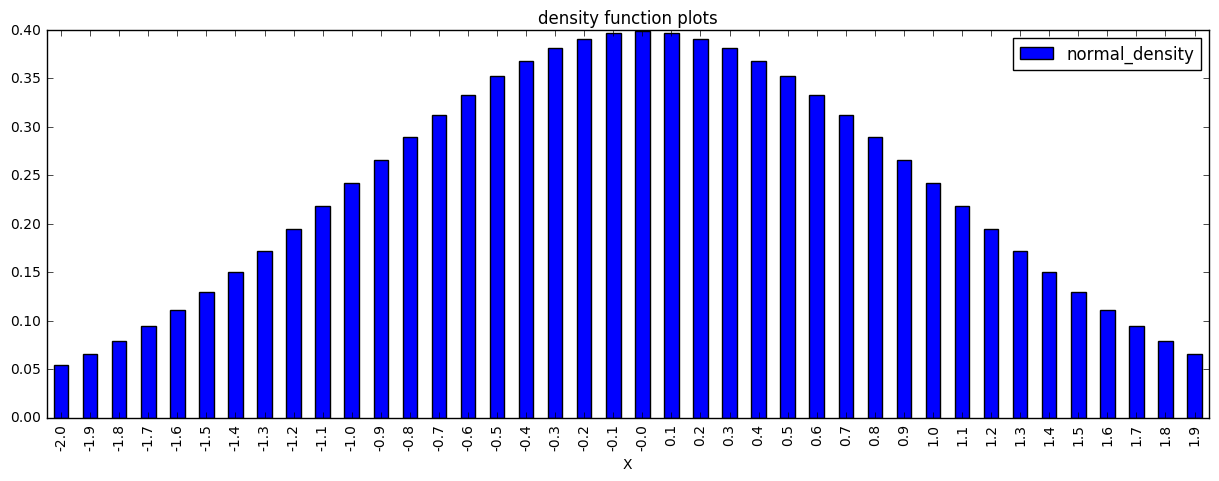

In [2]:
# 绘制分布函数
distributionFun.loc[:, ['discrete_distribution','normal_distribution']].plot(figsize = [15,5])
plt.title("distribution function plots")
plt.show()

# 绘制密度函数
distributionFun.loc[:, ['normal_density']].plot(figsize = [15,5], kind='bar')
plt.title("density function plots")
plt.show()
